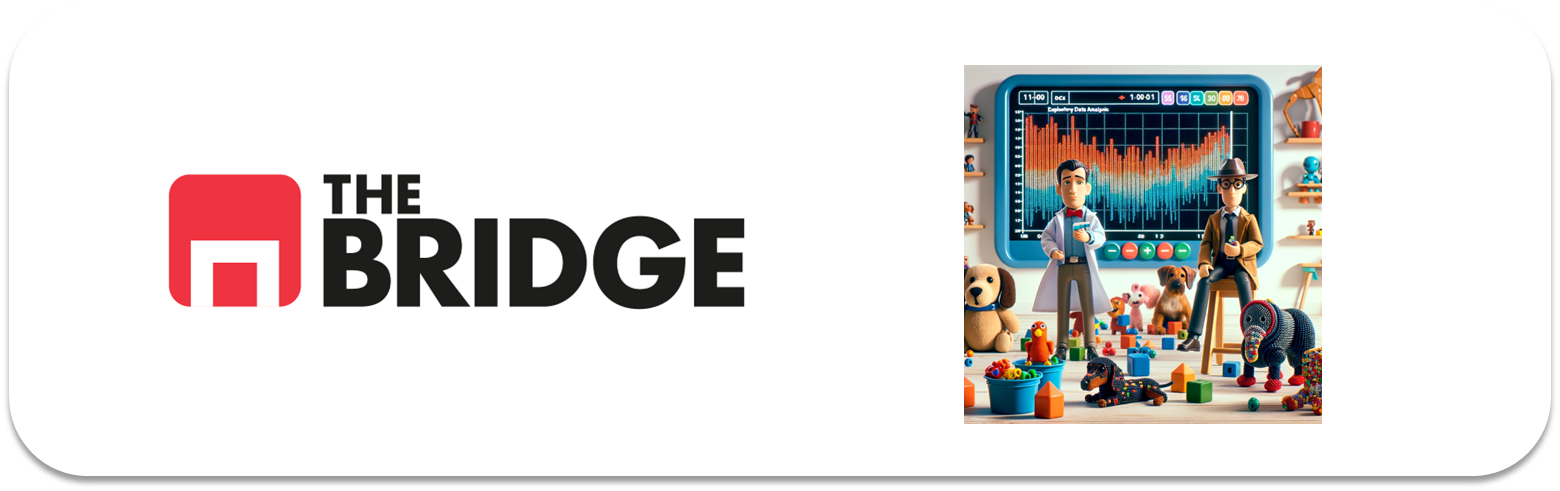

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [35]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [11]:
url_titanic = "https://raw.githubusercontent.com/rodolso/DS_Online_Octubre24_Exercises/main/03_Analisis_de_Datos/Sprint_07/Unidad_02/Practica_Obligatoria/data/titanic.csv"

titanic = pd.read_csv(url_titanic)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [19]:
# HACEMOS UNA COPIA DEL DF
df = titanic.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [20]:
# ELIMINAMOS LAS COLUMNAS QUE NO NOS INTERESAN
df.drop(columns = ["deck", "survived", "pclass", "embarked"], inplace = True)

In [21]:
df.columns

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'who', 'adult_male',
       'embark_town', 'alive', 'alone'],
      dtype='object')

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [22]:
# CREAMOS UNA NUEVA COLUMNA CON EL NUMERO DE FAMILIARES Y LUEGO
# ELIMINAMOS LAS DOS COLUMNAS QUE SE HAN USADO EN EL CÁLCULO
df["family_members"] = df["sibsp"] + df["parch"]
df.drop(columns = ["sibsp", "parch"], inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     889 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [ ]:
# OBTENEMOS LA MODA Y SE LA PASAMOS A LOS NULOS EN "EMBARK_TOWN"
embark_mode = df["embark_town"].mode()
df["embark_town"] = df["embark_town"].fillna(embark_mode[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [ ]:
age_means = df.groupby("who")["age"].mean()

# USO LA FUNCION MAP PARA RELLENAR LOS NULOS EN BASE A LOS VALORES DE LA COLUMNA "WHO"
df["age"] = df["age"].fillna(df["who"].map(age_means))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


In [28]:
df["who"].map(age_means)

0      33.173123
1      32.000000
2      32.000000
3      32.000000
4      33.173123
         ...    
886    33.173123
887    32.000000
888    32.000000
889    33.173123
890    33.173123
Name: who, Length: 891, dtype: float64

In [29]:
# REVISO QUE NO QUEDEN NULOS
print(df.isnull().sum())


sex               0
age               0
fare              0
class             0
who               0
adult_male        0
embark_town       0
alive             0
alone             0
family_members    0
dtype: int64


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

### 1 Pregunta: Supervivencia según sexo 

In [34]:
# OBTENEMOS LAS FRECUENCIAS ABSOLUTAS Y RELATIVAS
abs_survived_who = df[df['alive'] == 'yes']['who'].value_counts()
rel_survived_who = df[df['alive'] == 'yes']['who'].value_counts(normalize = True) * 100

print(abs_survived_who, "\n\n", rel_survived_who)

who
woman    205
man       88
child     49
Name: count, dtype: int64 

 who
woman    59.941520
man      25.730994
child    14.327485
Name: proportion, dtype: float64


In [43]:
# CREAMOS UNA COLUMNA PARA LOS NIÑOS 
df['is_child'] = (df['who'] == 'child').astype(int)

In [44]:
# CREAMOS LAS TABLAS DE CONTINGENCIA Y HACEMOS EL TEST DE CHI CUADRADO
contingency_sex = pd.crosstab(df['sex'], df['alive'])
contingency_child = pd.crosstab(df['is_child'], df['alive'])
contingency_who = pd.crosstab(df['who'], df['alive'])


chi2_sex, p_sex, sex_dof, sex_expected = stats.chi2_contingency(contingency_sex)
chi2_child, p_child, dof_child, expected_child = stats.chi2_contingency(contingency_child)
chi2_who, p_who, dof_who, expected_who = stats.chi2_contingency(contingency_who)

print("Chi2 sex: ", chi2_sex)
print("p-value sex: ", p_sex)
print("dof sex: ", sex_dof)
print("expected sex: ", sex_expected)
print("\n\n")
print("Chi2 child: ", chi2_child)
print("p-value child: ", p_child)
print("dof child: ", dof_child)
print("expected child: ", expected_child)
print("\n\n")
print("Chi2 who: ", chi2_who)
print("p-value who: ", p_who)
print("dof who: ", dof_who)
print("expected who: ", expected_who)



Chi2 sex:  260.71702016732104
p-value sex:  1.1973570627755645e-58
dof sex:  1
expected sex:  [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]



Chi2 child:  15.556993340077092
p-value child:  8.005497211300105e-05
dof child:  1
expected child:  [[497.85858586 310.14141414]
 [ 51.14141414  31.85858586]]



Chi2 who:  283.923050324233
p-value who:  2.2227620817798914e-62
dof who:  2
expected who:  [[ 51.14141414  31.85858586]
 [330.87878788 206.12121212]
 [166.97979798 104.02020202]]


### 2 Pregunta: Supervivencia según clase

In [45]:
# Obtenemos las frecuencias absolutas y relativas
abs_survived_class = df[df['alive'] == 'yes']['class'].value_counts()
rel_survived_class = df[df['alive'] == 'yes']['class'].value_counts(normalize = True) * 100

print(abs_survived_class, "\n\n", rel_survived_class)


class
First     136
Third     119
Second     87
Name: count, dtype: int64 

 class
First     39.766082
Third     34.795322
Second    25.438596
Name: proportion, dtype: float64


In [46]:
# CREAMOS LA TABLA DE CONTINGENCIA Y HACEMOS EL TEST
contingency_class = pd.crosstab(df['class'], df['alive'])
chi2_class, p_class, dof_class, expected_class = stats.chi2_contingency(contingency_class)

print("Chi2 class: ", chi2_class)
print("p-value class: ", p_class)
print("dof class: ", dof_class)
print("expected class: ", expected_class)


Chi2 class:  102.88898875696056
p-value class:  4.549251711298793e-23
dof class:  2
expected class:  [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


### Pregunta 3: Supervivencia según embarque

In [ ]:
# OBTENEMOS LAS FRECUENCIAS ABSOLUTAS Y RELATIVAS
abs_survived_town = df.loc[df['alive'] == 'yes']['embark_town'].value_counts()
rel_survived_town = df.loc[df['alive'] == 'yes']['embark_town'].value_counts(normalize = True) * 100

print(abs_survived_town, "\n\n", rel_survived_town)


embark_town
Southampton    219
Cherbourg       93
Queenstown      30
Name: count, dtype: int64 

 embark_town
Southampton    64.035088
Cherbourg      27.192982
Queenstown      8.771930
Name: proportion, dtype: float64


In [51]:
# CREAMOS LA TABLA DE CONTINGENCIA Y HACEMOS EL TEST
contingency_town = pd.crosstab(df['embark_town'], df['alive'])
chi2_town, p_town, dof_town, expected_town = stats.chi2_contingency(contingency_town)

print("Chi2 town: ", chi2_town)
print("p-value town: ", p_town)
print("dof town: ", dof_town)
print("expected town: ", expected_town)

Chi2 town:  25.964452881874784
p-value town:  2.3008626481449577e-06
dof town:  2
expected town:  [[103.51515152  64.48484848]
 [ 47.44444444  29.55555556]
 [398.04040404 247.95959596]]


### Pregunta 4: Supervivencia según precio del billete

In [52]:
df["fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [63]:
avg_fare_survived_byclass = df.groupby(["class", 'alive'])['fare'].agg(['mean', 'median']).reset_index()

print(avg_fare_survived_byclass)


    class alive       mean   median
0   First    no  64.684007  44.7500
1   First   yes  95.608029  77.9583
2  Second    no  19.412328  13.0000
3  Second   yes  22.055700  21.0000
4   Third    no  13.669364   8.0500
5   Third   yes  13.694887   8.5167


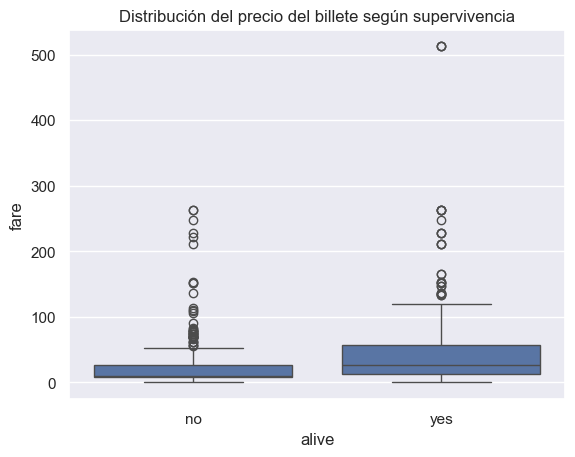

In [54]:
sns.set_theme()
sns.boxplot(data = df, x = 'alive', y = 'fare')
plt.title('Distribución del precio del billete según supervivencia')
plt.show()

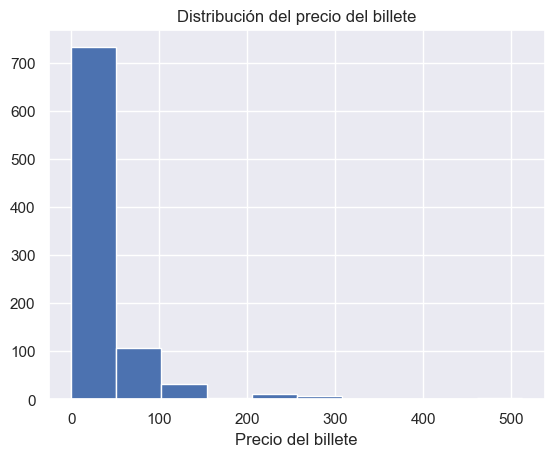

In [57]:
plt.hist(df["fare"])
plt.title("Distribución del precio del billete")
plt.xlabel("Precio del billete")	
plt.show()

Podemos decir que sobrevivió un mayor número de personas que han pagado un mayor precio de billete.

### Pregunta 5: Pasajeros que no pagaron el billete

In [ ]:
# FILTRAMOS LOS PASAJEROS QUE NO PAGARON
no_fare_passengers = df[df['fare'] == 0]
no_fare_passengers


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,is_child
179,male,36.000000,0.0,Third,man,True,Southampton,no,True,0,0
263,male,40.000000,0.0,First,man,True,Southampton,no,True,0,0
271,male,25.000000,0.0,Third,man,True,Southampton,yes,True,0,0
277,male,33.173123,0.0,Second,man,True,Southampton,no,True,0,0
302,male,19.000000,0.0,Third,man,True,Southampton,no,True,0,0
413,male,33.173123,0.0,Second,man,True,Southampton,no,True,0,0
466,male,33.173123,0.0,Second,man,True,Southampton,no,True,0,0
481,male,33.173123,0.0,Second,man,True,Southampton,no,True,0,0
597,male,49.000000,0.0,Third,man,True,Southampton,no,True,0,0
633,male,33.173123,0.0,First,man,True,Southampton,no,True,0,0


In [ ]:
# MOSTRAMOS LOS PASAJEROS QUE MÁS PAGARON
max_fare_passenger = df[df['fare'] == df['fare'].max()]

max_fare_passenger

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,is_child
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0,0
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1,0
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0,0


### Pregunta 6: Supervivencia según embarque y precio billete

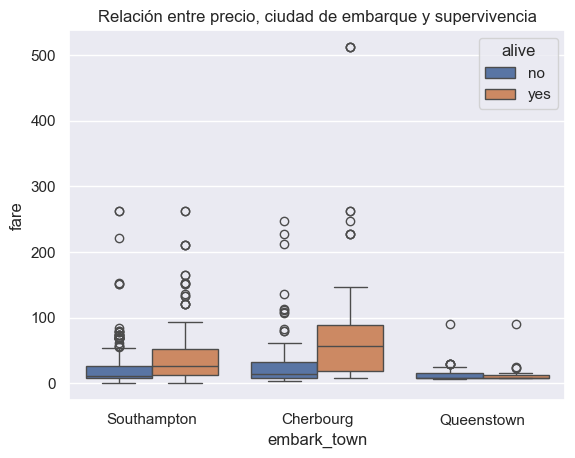

In [ ]:
# MOSTRAMOS LA DISTRIBUCIÓN SEGÚN LAS VARIABLES
sns.boxplot(data = df, x = 'embark_town', y = 'fare', hue = 'alive')
plt.title('Relación entre precio, ciudad de embarque y supervivencia')
plt.show()


### Pregunta 7: Supervivencia según edad y clase

In [72]:
# EN ESTE CASO VOY A CREARME MIS PROPIAS CATEGORIAS DE EDAD 
# EN VEZ DE USAR LA COLUMNA WHO
bins = [0, 12, 18, 35, 60, 80]  
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
# GENERO LAS DIVISIONES EN UNA NUEVA COLUMNA
df['age_group'] = pd.cut(df['age'], bins = bins, labels = labels)

df["age_group"].value_counts()

age_group
Young Adult    535
Adult          195
Teenager        70
Child           69
Senior          22
Name: count, dtype: int64

In [ ]:
# FRECUENCIAS ABSOLUTAS Y RELATIVAS SEGÚN CLASE Y EDAD
survival_by_class_age = df.groupby(['class', 'age_group'], observed = True)['alive'].apply(lambda x: (x == 'yes').sum()).reset_index()
survival_by_class_age['relative'] = survival_by_class_age.groupby('class', observed = True)['alive'].transform(lambda x: x / x.sum() * 100)

print(survival_by_class_age)


     class    age_group  alive   relative
0    First        Child      3   2.205882
1    First     Teenager     11   8.088235
2    First  Young Adult     64  47.058824
3    First        Adult     55  40.441176
4    First       Senior      3   2.205882
5   Second        Child     17  19.540230
6   Second     Teenager      6   6.896552
7   Second  Young Adult     45  51.724138
8   Second        Adult     18  20.689655
9   Second       Senior      1   1.149425
10   Third        Child     20  16.806723
11   Third     Teenager     13  10.924370
12   Third  Young Adult     80  67.226891
13   Third        Adult      5   4.201681
14   Third       Senior      1   0.840336


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   sex             891 non-null    object  
 1   age             891 non-null    float64 
 2   fare            891 non-null    float64 
 3   class           891 non-null    object  
 4   who             891 non-null    object  
 5   adult_male      891 non-null    bool    
 6   embark_town     891 non-null    object  
 7   alive           891 non-null    object  
 8   alone           891 non-null    bool    
 9   family_members  891 non-null    int64   
 10  is_child        891 non-null    int32   
 11  age_group       891 non-null    category
dtypes: bool(2), category(1), float64(2), int32(1), int64(1), object(5)
memory usage: 62.1+ KB


### Pregunta 8: Supervivencia según coste del billete y edad

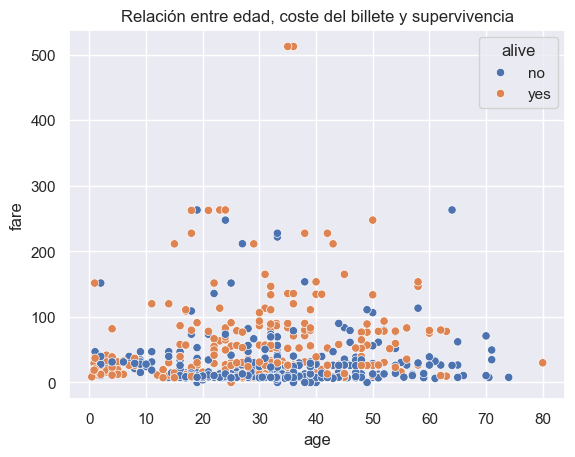

In [ ]:
# GRAFICO DE DISPERSION DE LAS TRES VARIABLES
sns.scatterplot(data = df, x = 'age', y = 'fare', hue = 'alive')
plt.title('Relación entre edad, coste del billete y supervivencia')
plt.show()

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamento de DataScience de TabarAir)

In [88]:
url_airjun = "https://raw.githubusercontent.com/rodolso/DS_Online_Octubre24_Exercises/main/03_Analisis_de_Datos/Sprint_07/Unidad_02/Practica_Obligatoria/data/dataset_viajes_jun23.csv"

df_avion = pd.read_csv(url_airjun)

df_avion.head()

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23


In [93]:
df_avion['aircompany'].value_counts()

aircompany
TabarAir      142
MoldaviAir    133
PamPangea     117
FlyQ          108
Airnar        100
Name: count, dtype: int64

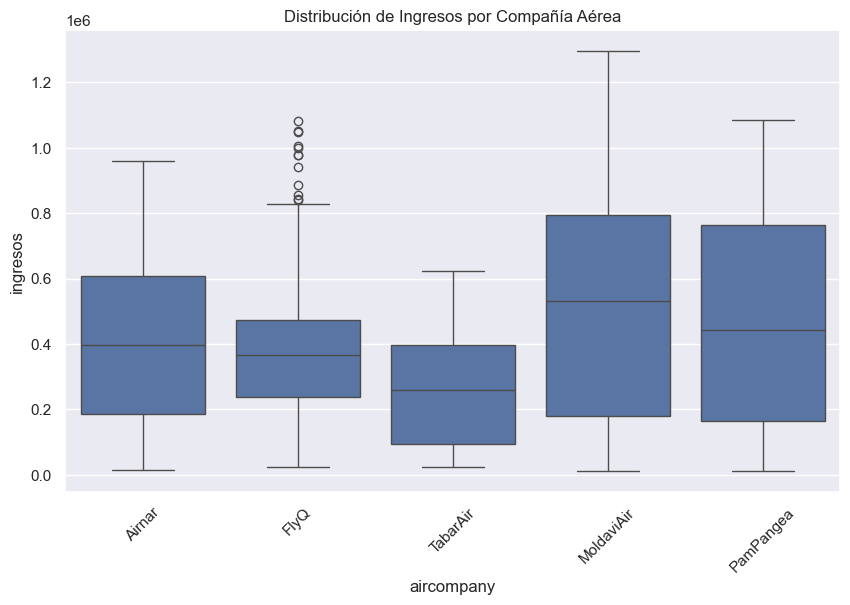

In [92]:
# Boxplot para analizar los ingresos por cada compañía aérea
plt.figure(figsize = (10, 6))
sns.boxplot(data = df_avion, x = 'aircompany', y = 'ingresos')
plt.title('Distribución de Ingresos por Compañía Aérea')
plt.xticks(rotation = 45)
plt.show()

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

In [ ]:
# CORRELACIONES DE LAS TRES VARIABLES
correlation = df_avion[['ingresos', 'distancia', 'consumo_kg']].corr()

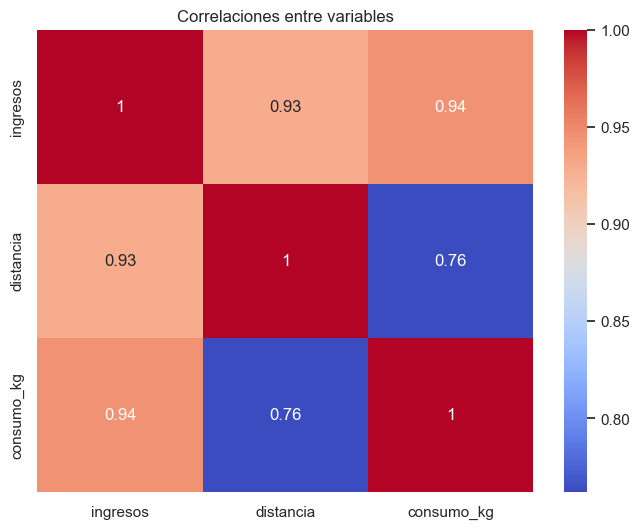

In [ ]:
# PINTAMOS EL HEATMAP DE LAS CORRELACIONES
plt.figure(figsize = (8, 6))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
plt.title('Correlaciones entre variables')
plt.show()

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

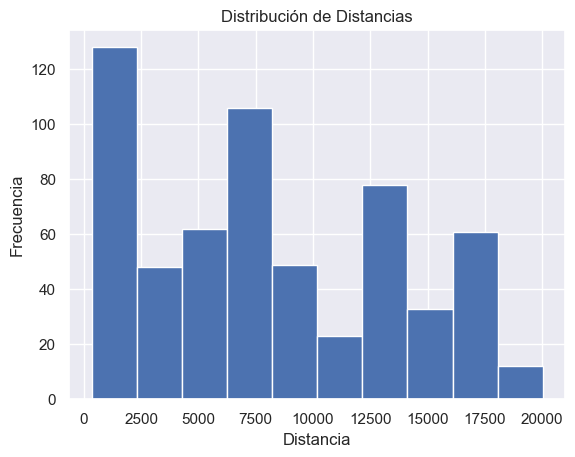

In [ ]:
# MOSTRAMOS LAS DISTANCIAS EN UN HISTOGRAMA
plt.hist(df_avion['distancia'])
plt.title('Distribución de Distancias')
plt.xlabel("Distancia")
plt.ylabel("Frecuencia")
plt.show()

In [108]:
# DEFINIMOS LOS RANGOS DE LAS CATEGORIAS EN BASE A LA DISTANCIA
distancias_rangos = [0, 5000, 10000, 15000, df_avion['distancia'].max()]
labels = ['Corta', 'Media', 'Larga', 'Muy Larga']

df_avion['cat_vuelo'] = pd.cut(df_avion['distancia'], bins = distancias_rangos, labels = labels)

print(df_avion['cat_vuelo'].value_counts())

cat_vuelo
Media        204
Corta        176
Larga        114
Muy Larga    106
Name: count, dtype: int64


### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.